<a href="https://colab.research.google.com/github/ashborn8/Reconocimiento/blob/main/Cats_vs_Dogs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Paso 1: Importar las bibliotecas necesarias

import tensorflow as tf
from tensorflow.keras import layers, models #Capas y modelos
import tensorflow_datasets as tfds #Cargar datasets
import matplotlib.pyplot as plt #Ver imagenes y resultados


In [ ]:
# Cargar el conjunto de datos "Cats vs Dogs" de tensorflow Datasets
# Tensorflow Datasets se encarga de descargar y preparar los datos
(ds_train, ds_val), ds_info = tfds.load( #descargar conjunto de datos
    'cats_vs_dogs',
    split=['train[:80%]', 'train[80%:]'], #80% para entrenamiento, 20% para validacion
    as_supervised=True, #devolver tuplas(imagen y etiqueta)
    with_info=True, #informacion adicional
)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/23262 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/cats_vs_dogs/incomplete.RAWZQF_4.0.1/cats_vs_dogs-train.tfrecord*...:   0%…

Dataset cats_vs_dogs downloaded and prepared to /root/tensorflow_datasets/cats_vs_dogs/4.0.1. Subsequent calls will reuse this data.


In [ ]:
# Paso 2: Preprocesamiento de datos
# Definir funciones de preprocesamiento

IMG_SIZE = 120

In [ ]:
def preprocess(image, label): #imagen y etiqueta
    image = tf.image.resize(image, (IMG_SIZE, IMG_SIZE)) #redimensionar la imagen
    image = image / 255.0 #normalizar la imagen entre 0 y 1
    return image, label

In [ ]:
# Aplicar preprocesamiento
ds_train = ds_train.map(preprocess).batch(32).cache().prefetch(buffer_size=tf.data.AUTOTUNE)
ds_val = ds_val.map(preprocess).batch(32).cache().prefetch(buffer_size=tf.data.AUTOTUNE)

In [ ]:
def show_batch(dataset, batch_size=9): #mostrar imagenes del batch
    plt.figure(figsize=(10, 10))  # Ajustar el tamaño de la figura
    for images, labels in dataset.take(1):  # Tomar solo un lote
        for i in range(batch_size):  # Recorrer las imágenes en el lote
            ax = plt.subplot(3, 3, i + 1)  # Crear subgráficos
            plt.imshow(images[i].numpy())  # Convertir la imagen a formato numpy para mostrarla
            plt.title("Perro" if labels[i] == 1 else "Gato")  # Establecer el título según la etiqueta
            plt.axis("off")

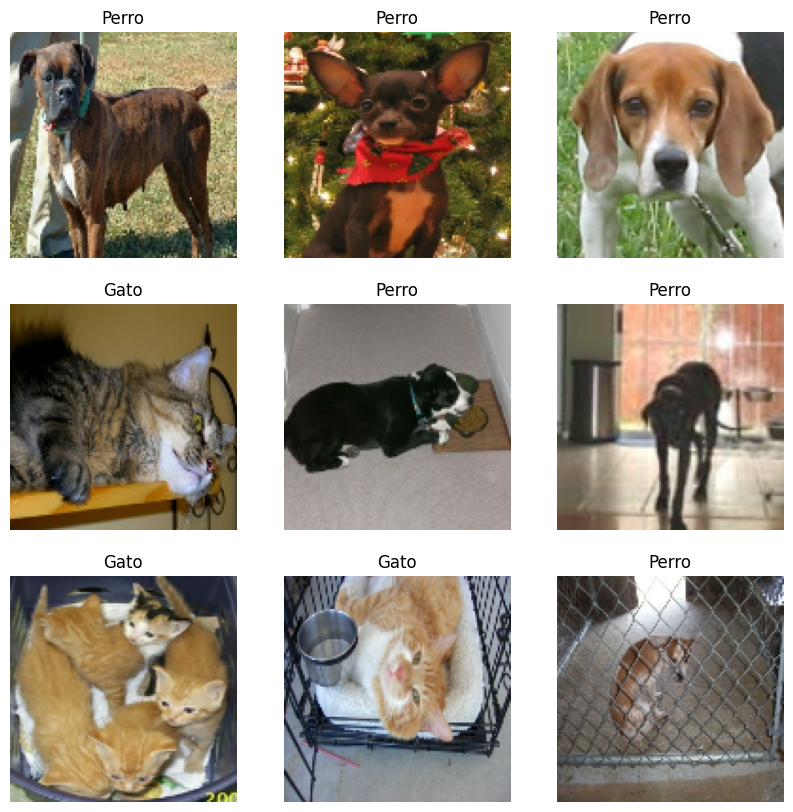

In [ ]:
# ver resultado del entrenamiento
show_batch(ds_train)

In [ ]:
# Paso 3: Crear el modelo
model = models.Sequential([ #pila de capas
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)), #32 filtros de 3x3 #especifica el tamaño de entrada
    layers.MaxPooling2D(2, 2), #capa de agrupacion
    layers.Conv2D(64, (3, 3), activation='relu'), #capa de convolucion
    layers.MaxPooling2D(2, 2), #capa de agrupacion
    layers.Conv2D(128, (3, 3), activation='relu'), #capa de convolucion
    layers.MaxPooling2D(2, 2), #capa de agrupacion
    layers.Flatten(), #capa de aplanado
    layers.Dense(128, activation='relu'), #capa de conectividad
    layers.Dense(1, activation='sigmoid')  # Salida con una neurona para clasificación binaria
])

In [ ]:
 # paso 4: Compilar el modelo
 model.compile(optimizer='adam',
               loss='binary_crossentropy',
               metrics=['accuracy'])

In [ ]:
# Paso 5: Entrenar el modelo
history = model.fit(ds_train, epochs=10, validation_data=ds_val)

Epoch 1/10
582/582 [==============================] - 53s 88ms/step - loss: 0.6153 - accuracy: 0.6477 - val_loss: 0.5450 - val_accuracy: 0.7165
Epoch 2/10
582/582 [==============================] - 50s 85ms/step - loss: 0.4923 - accuracy: 0.7628 - val_loss: 0.4593 - val_accuracy: 0.7934
Epoch 3/10
582/582 [==============================] - 49s 84ms/step - loss: 0.4101 - accuracy: 0.8120 - val_loss: 0.4113 - val_accuracy: 0.8076
Epoch 4/10
582/582 [==============================] - 50s 86ms/step - loss: 0.3350 - accuracy: 0.8552 - val_loss: 0.4412 - val_accuracy: 0.8003
Epoch 5/10
582/582 [==============================] - 50s 86ms/step - loss: 0.2689 - accuracy: 0.8847 - val_loss: 0.4415 - val_accuracy: 0.8151
Epoch 6/10
582/582 [==============================] - 50s 87ms/step - loss: 0.2071 - accuracy: 0.9140 - val_loss: 0.6085 - val_accuracy: 0.7915
Epoch 7/10
582/582 [==============================] - 50s 85ms/step - loss: 0.1611 - accuracy: 0.9343 - val_loss: 0.6281 - val_accuracy:

In [ ]:
# Paso 6: Evaluar el modelo
loss, accuracy = model.evaluate(ds_val)
print(f'Precisión en el conjunto de validación: {accuracy:.2f}')

146/146 [==============================] - 3s 22ms/step - loss: 0.8398 - accuracy: 0.7979
Precisión en el conjunto de validación: 0.80


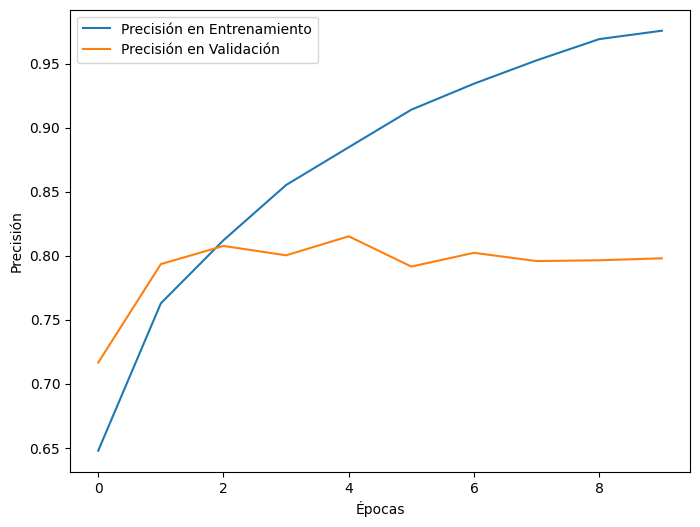

In [ ]:
# Paso 7: Visualizar los resultados de entrenamiento
# Precisión de entrenamiento y validación
plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], label='Precisión en Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión en Validación')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()
plt.show()

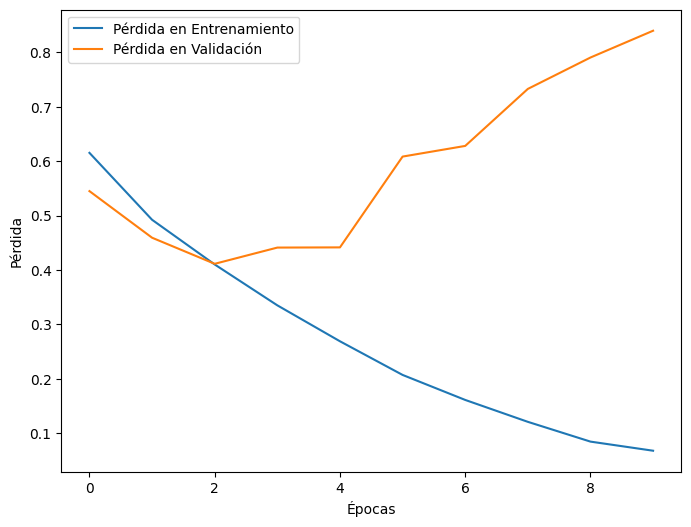

In [ ]:
# Pérdida de entrenamiento y validación
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Pérdida en Entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida en Validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.show()

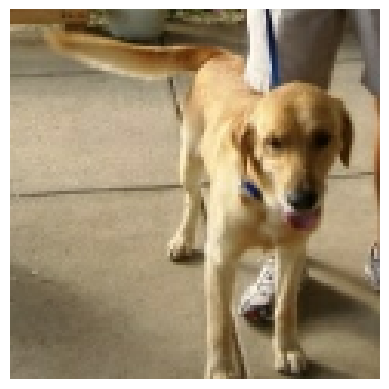

1/1 [==============================] - 0s 101ms/step
Predicción: Gato
Etiqueta real: Perro


In [ ]:
# Paso 8: Inferencia en una imagen de prueba
import numpy as np
from tensorflow.keras.preprocessing import image

for image, label in ds_val.take(1):  # Tomar una imagen de validación
    plt.imshow(image[0])
    plt.axis('off')
    plt.show()

    prediccion = model.predict(tf.expand_dims(image[0], axis=0))
    print(f'Predicción: {"Perro" if prediccion[0] > 0.5 else "Gato"}')
    print(f'Etiqueta real: {"Perro" if label[0] == 1 else "Gato"}')

In [ ]:
# Definir los nombres de las clases
class_names = ['Gato', 'Perro']

In [ ]:
# Función de predicción
def predict_image(image_path):
    # Cargar la imagen
    img = tf.keras.preprocessing.image.load_img(image_path, target_size=(IMG_SIZE, IMG_SIZE))
    img_array = tf.keras.preprocessing.image.img_to_array(img) / 255.0
    img_array = tf.expand_dims(img_array, 0)  # Añadir una dimensión para el lote

    # Realizar la predicción
    prediction = model.predict(img_array)
    predicted_class_idx = int(tf.round(prediction[0][0]).numpy())
    confidence = prediction[0][0]

    return predicted_class_idx, confidence

In [ ]:
# Ruta de la imagen a predecir
image_path = '/content/WhatsApp Image 2024-10-31 at 10.21.14 AM.jpeg'  # Cambia esto a la ruta de tu imagen
predicted_class_idx, confidence = predict_image(image_path)

1/1 [==============================] - 0s 28ms/step


In [ ]:
# Mostrar los resultados
print(f'Predicción: {class_names[predicted_class_idx]} (Confianza: {confidence:.2f})')

Predicción: Perro (Confianza: 0.97)


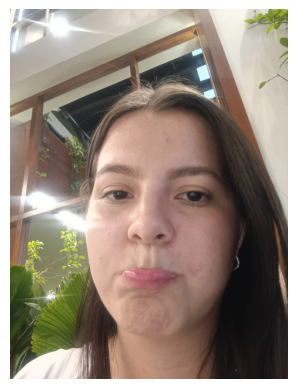

In [ ]:
# Visualizar la imagen
img = tf.keras.preprocessing.image.load_img(image_path)
plt.imshow(img)
plt.axis('off')
plt.show()